<h1 align=center style="line-height:300%;color:#0099cc">
<font color="#0099cc">
Data Mining Practice 2
</font>
</h1>


<div>
<h3 style="font-size: 16;line-height:100%;color:white">
Importing Libraries
</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---


<div>
<h3 style="font-size: 16;line-height:100%;color:white">
Loading the data
</h3>
</div>

In [2]:
# load data

train_df = pd.read_csv('/content/Adult_TrainDataset.csv')
test_df = pd.read_csv('/content/Adult_TestDataset.csv')
train_df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



---


<div>
<h3 style="font-size: 16;line-height:100%;color:white">
Data Analysis
</h3>
</div>

<div>
<p style="font-size: 16;line-height:100%;color:white">
In this section,we examine the dataset in different ways, including drawing different plots, to get a general intuition about it. 
</p>

</div>

In [3]:
rows_with_missing = train_df[train_df.isna().any(axis=1)]
rows_with_missing

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income


In [4]:
rows_with_missing2 = test_df[test_df.isna().any(axis=1)]
rows_with_missing2
# as we can see there is no missing values in our dataset so we dont need to deal with it

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income


In [ ]:
# # first we delete the datas that have missing values for  two or more features
# train_df = train_df.dropna(thresh=train_df.shape[1] - 1)
# test_df = test_df.dropna(thresh=test_df.shape[1] - 1)
# train_df.shape
# test_df.shape

################## NO NEED FOR THIS CODE NO MORE ######################

In [ ]:
# # now we fill the only missing values of each data with its feature'e mean
# mean_values = train_df.mean()
# train_df.fillna(mean_values, inplace=True)
# # this will skip the non-numeric values

################## NO NEED FOR THIS CODE NO MORE ######################

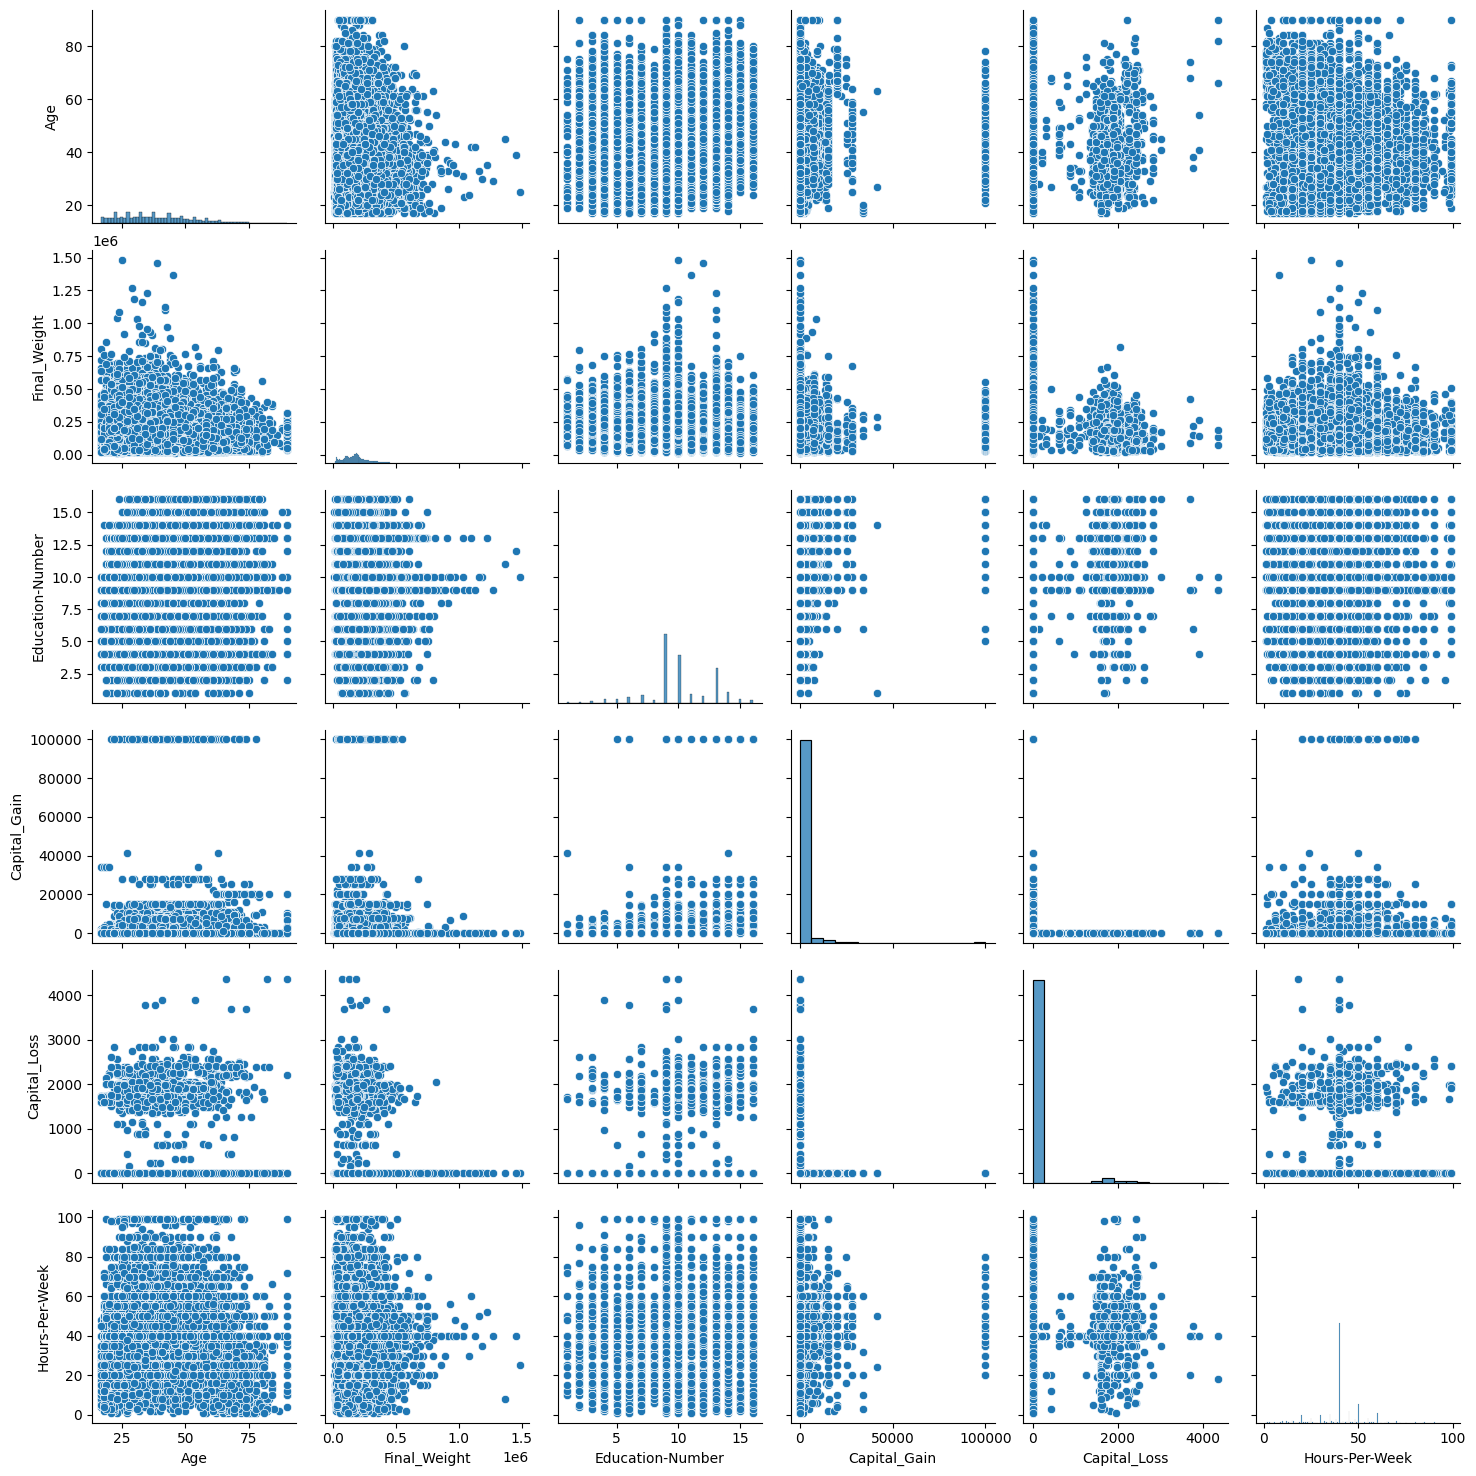

In [5]:
# Understanding Dataset
# in here we visualize Scatterplot matrix and a heatmap of the correlation matrix to see how different (numeric) features correlate.
import seaborn as sns
sns.pairplot(train_df)
plt.show()
##########################      this is       ##############################
########################## Scatterplot Matrix ##############################

<ipython-input-6-f479a2e244e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


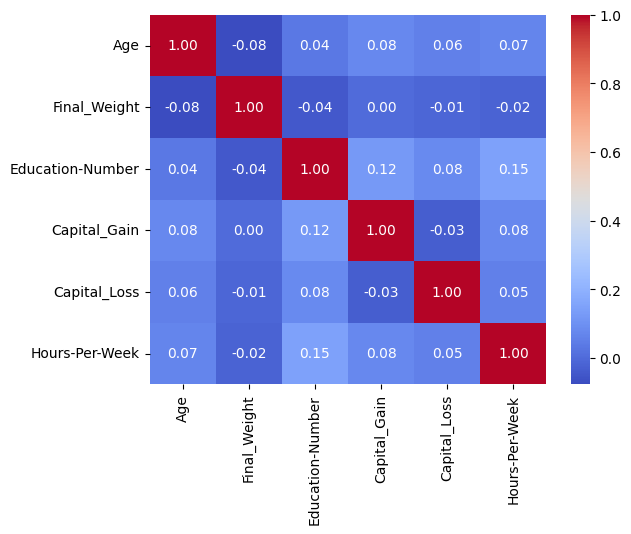

In [6]:
# Calculate the correlation matrix
corr = train_df.corr()

# Create a heatmap
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
##########################      this is       ##############################
########################## Correlation Matrix ##############################


---


<div>
<h3 style="font-size: 16;line-height:100%;color:white">
Data Preprocessing
</h3>
</div>
<div>
<p style="font-size: 16;line-height:100%;color:white">
In this section, the data is processed using different methods and the necessary changes are made to the data to increase the final accuracy.
</p>
<p style="font-size: 16;line-height:100%;color:white">
There are different methods for encoding categorical data, including One-hot Encoding and Label Encoding. Here we compare these two methods and explain which method gives better results and encode the data with the selected method.
</p>
<p style="font-size: 16;line-height:100%;color:white">
In One-hot Encoding, each category of a categorical feature is converted into a new column in the data frame. For each record, only one of these columns will have a value of 1 (representing that category), and the rest will have a value of 0.
</p>

- Pros: Prevents any unwanted ordinal relationships between categories. Useful for algorithms that consider distance and order.
- Cons: Can lead to a significant increase in the number of dimensionality of features, especially if the number of feature categories is very large (a problem called the "Curse of Dimensionality").


<p style="font-size: 16;line-height:100%;color:white">
In Label Encoding, however, each category of a categorical feature is mapped to a unique integer.
</p>

- Pros: Does not increase the number of features, so it is suitable for features with a large number of categories.
- Cons: Can create unwanted ordinal or numerical relationships between categories that do not really exist. This can affect the interpretation of machine learning algorithms.
<p style="font-size: 16;line-height:100%;color:white">
Here, we label encode the education column because the order makes sense, but we encode the rest of the features using the one-hot method so that unwanted ordinal relationships do not occur and do not reduce the performance of our model.
</p>
</div>

In [3]:
# Data Preprocessing
# first we encode the non numderic features using label encoding to avoid increasing dimensionality (READ THE MARKDOWN ABOVE)

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Work_Class', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country']

# Label Encoding
le = LabelEncoder()
train_df['Education'] = le.fit_transform(train_df['Education'])
test_df['Education'] = le.fit_transform(test_df['Education'])

# One hot Encoding
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols)

train_df_encoded.head()
train_df_encoded.shape

(32561, 94)

In [4]:
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols)
test_df_encoded.shape

(16281, 93)

As you can see, the test and training data differ in the number of categories, so we need to merge the two once and then perform one hot encoding.

In [5]:

# Combine the training and test data to find all possible categories
all_data = pd.concat([train_df[categorical_cols], test_df[categorical_cols]])

# Perform get_dummies on the combined data
all_encoded = pd.get_dummies(all_data, columns=categorical_cols)

# Separate the encoded data back into training and test sets
encoded_train = all_encoded.iloc[:train_df.shape[0], :]
encoded_test = all_encoded.iloc[train_df.shape[0]:, :]

# add the rest of the columns back
non_categorical_cols = train_df.columns.difference(categorical_cols)
train_df_encoded = pd.concat([train_df[non_categorical_cols].reset_index(drop=True), encoded_train.reset_index(drop=True)], axis=1)
test_df_encoded = pd.concat([test_df[non_categorical_cols].reset_index(drop=True), encoded_test.reset_index(drop=True)], axis=1)
print(train_df_encoded.shape)
print(test_df_encoded.shape)
test_df_encoded.head()

(32561, 94)
(16281, 94)


,Age,Capital_Gain,Capital_Loss,Education,Education-Number,Final_Weight,Hours-Per-Week,Income,Work_Class_ ?,Work_Class_ Federal-gov,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,25,0,0,1,7,226802,40,<=50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,11,9,89814,50,<=50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,7,12,336951,40,>50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,15,10,160323,40,>50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,15,10,103497,30,<=50K.,1,0,...,0,0,0,0,0,0,0,1,0,0


as you can see the values in income are different in test and train data, the test data have a '.' at the end of each value

In [6]:
# as you can see the values in income are different in test and train data, the test data have a '.' at the end of each value
test_df_encoded['Income'] = test_df_encoded['Income'].str.rstrip('.')

test_df_encoded.head()


,Age,Capital_Gain,Capital_Loss,Education,Education-Number,Final_Weight,Hours-Per-Week,Income,Work_Class_ ?,Work_Class_ Federal-gov,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,25,0,0,1,7,226802,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,11,9,89814,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,7,12,336951,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,15,10,160323,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,15,10,103497,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0


in here we delete one category from each feature because for example if we know all the other categories are not 1 the its the category that we deleted so we dont need its column

In [7]:
train_df_encoded = train_df_encoded.drop(columns=['Work_Class_ Private','Marital_Status_ Divorced','Occupation_ Adm-clerical','Relationship_ Husband','Race_ Amer-Indian-Eskimo','Sex_ Female'])
test_df_encoded = test_df_encoded.drop(columns=['Work_Class_ Private','Marital_Status_ Divorced','Occupation_ Adm-clerical','Relationship_ Husband','Race_ Amer-Indian-Eskimo','Sex_ Female'])
print(train_df_encoded.shape)
print(test_df_encoded.shape)


(32561, 88)
(16281, 88)


Since we're using SVM and baysian networks, standardization is typically more appropriate

In [23]:
# Since we're using SVM and baysian networks, standardization is typically more appropriate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



X_train = train_df_encoded.drop('Income', axis=1)
y_train = train_df_encoded['Income']
X_test = test_df_encoded.drop('Income', axis=1)
y_test = test_df_encoded['Income']


# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


X_train

array([[ 0.03067056,  0.1484529 , -0.21665953, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.83710898, -0.14592048, -0.21665953, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.04264203, -0.14592048, -0.21665953, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.14592048, -0.21665953, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-1.21564337, -0.14592048, -0.21665953, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.98373415,  1.88842434, -0.21665953, ...,  0.34095391,
        -0.04540836, -0.02217266]])


---


<div>
<h3 style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Support Vector Machine
</h3>
</div>


to find the best hyperparameters for our model we use Grid Search, it systematically goes through multiple combinations of hyperparameter values. It evaluates the model for each combination of the hyperparameter values provided in the grid.

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf']  # Type of kernel
}

# Create a base model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print(grid_search.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'kernel': 'linear'}


so as we can see the best hyperparameter for our model here is

In [31]:
# Training the SVM model
svm = SVC(kernel='linear')  #hyperparameter
svm.fit(X_train, y_train)

# Making predictions
y_pred = svm.predict(X_test)




In [38]:
# Evaluating the model
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average="binary", pos_label=' <=50K')
svm_recall = recall_score(y_test, y_pred, average="binary", pos_label=' <=50K')
svm_f1 = f1_score(y_test, y_pred, average="binary", pos_label=' <=50K')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11594   841]
 [ 1552  2294]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     12435
        >50K       0.73      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



<div style="border-top: 1px dashed #999;"></div>

<div >
<h3 style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
K-Nearest Neighbors</h3>
</div>

again to find the best hyperparameters we use gridsearch

In [17]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)



Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Parameters:  {'n_neighbors': 15}


In [39]:
my_knn = KNeighborsClassifier(n_neighbors=15)

my_knn.fit(X_train, y_train)

y_pred = my_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average="binary", pos_label=' <=50K')
knn_recall = recall_score(y_test, y_pred, average="binary", pos_label=' <=50K')
knn_f1 = f1_score(y_test, y_pred, average="binary", pos_label=' <=50K')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11431  1004]
 [ 1700  2146]]
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     12435
        >50K       0.68      0.56      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.74      0.75     16281
weighted avg       0.83      0.83      0.83     16281



<div style="border-top: 1px dashed #999;"></div>

<div>
<h3 style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Naive Bayes
</h3>
</div>

In [40]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average="binary", pos_label=' <=50K')
nb_recall = recall_score(y_test, y_pred, average="binary", pos_label=' <=50K')
nb_f1 = f1_score(y_test, y_pred, average="binary", pos_label=' <=50K')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12435     0]
 [ 3846     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.87     12435
        >50K       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="border-top: 1px dashed #999;"></div>

<div>
<h3 style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Random Forest
</h3>
</div>

again with we use grid search to find the best hyperparameters

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print(grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'n_estimators': 400}


In [41]:
rf_classifier = RandomForestClassifier(n_estimators=400)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average="binary", pos_label=' <=50K')
rf_recall = recall_score(y_test, y_pred, average="binary", pos_label=' <=50K')
rf_f1 = f1_score(y_test, y_pred, average="binary", pos_label=' <=50K')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11549   886]
 [ 1523  2323]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     12435
        >50K       0.72      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281




---


<div>
<h3 style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Comparring Models</h3>
</div>

<div>
<p style="font-size: 16;line-height:100%;color:white">

Finally, after training the models, use the dataset
<code> Adult_TestDataset </code> to evaluate the performance of the models and analyze the results using the confusion matrix
<code> (confusion matrix) </code>
and the evaluation criteria
<code> recall </code>,
<code> precision </code>,
<code> accuracy </code>,
<code> f1-score </code>
. Note that for simplicity, you can obtain the correlation matrix and evaluation criteria using the ready-made sklearn functions.
</p>
</div>

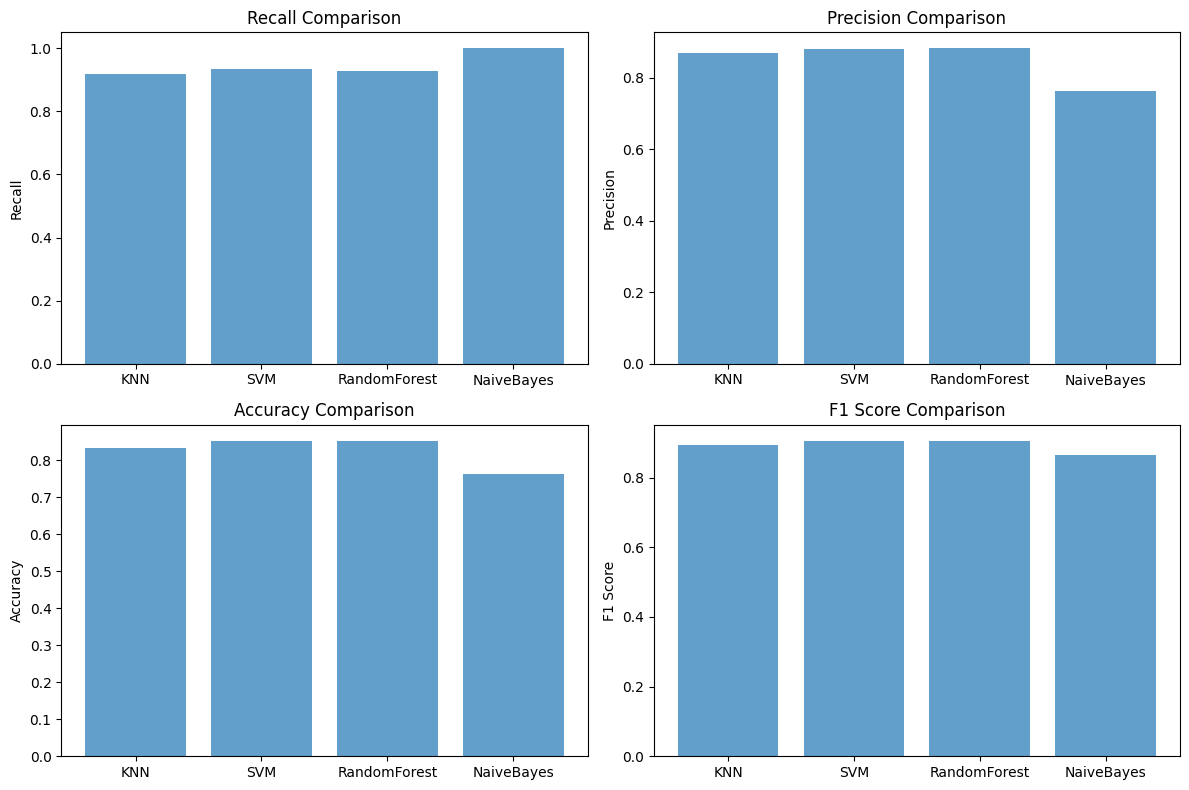

In [42]:
# Combine metrics into lists
recalls = [knn_recall, svm_recall, rf_recall, nb_recall]
precisions = [knn_precision, svm_precision, rf_precision, nb_precision]
accuracies = [knn_accuracy, svm_accuracy, rf_accuracy, nb_accuracy]
f1_scores = [knn_f1, svm_f1, rf_f1, nb_f1]

labels = ['KNN', 'SVM', 'RandomForest', 'NaiveBayes']
x = range(len(labels))  # the label locations

def plot_metrics(metrics, title, ylabel):
    plt.bar(x, metrics, align='center', alpha=0.7)
    plt.xticks(x, labels)
    plt.ylabel(ylabel)
    plt.title(title)

# Plot each metric
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plot_metrics(recalls, 'Recall Comparison', 'Recall')

plt.subplot(2, 2, 2)
plot_metrics(precisions, 'Precision Comparison', 'Precision')

plt.subplot(2, 2, 3)
plot_metrics(accuracies, 'Accuracy Comparison', 'Accuracy')

plt.subplot(2, 2, 4)
plot_metrics(f1_scores, 'F1 Score Comparison', 'F1 Score')

plt.tight_layout()
plt.show()



---


<div>
<h3 style="font-size: 16;line-height:100%;font-family:times new roman;color:green">
More practice
</h3>

<p style="text-align: justify;line-height:200%;font-size:medium">
In here we explore more methods.
</p>

</div>



Gradient Boosting is an ensemble technique that builds a series of models in a sequential manner. Each new model gradually minimizes the loss function (usually a mean squared error) of the whole system using the Gradient Descent method. The idea is to combine several weak models to create a highly accurate prediction. this is an ensemlbe technique just like random forrest

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11810   625]
 [ 1545  2301]]
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92     12435
        >50K       0.79      0.60      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.77      0.80     16281
weighted avg       0.86      0.87      0.86     16281



as you can see this method gave us high accuracy and its very powerfull in some cases

another classifier is Logistic Regression, it is a linear model for classification rather than regression. It is a good choice for binary classification (and also multiclass, with some extensions) problems.

In [45]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11550   885]
 [ 1506  2340]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     12435
        >50K       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281



the results are good as svm and rf that we previously had but this is also very powerfull and efficient method for binary classifications